In [11]:
!pip install tensorflow

In [12]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [13]:
!pip install scipy

In [14]:
!pip install seaborn

In [15]:
!pip install matplotlib

In [32]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# Parameter
IMG_SIZE = (224, 224)  # Ukuran gambar untuk MobileNetV2
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

In [18]:
# Direktori dataset
train_dir = "train"
test_dir = "test"

In [19]:
# Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [20]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [21]:
# Generator Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 6881 images belonging to 116 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 1292 images belonging to 116 classes.


In [23]:
# Informasi jumlah kelas
num_classes = len(train_generator.class_indices)

In [24]:
# Model Transfer Learning
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Bekukan layer pada model dasar

In [25]:
# Tambahkan lapisan khusus
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)  # Dropout untuk mencegah overfitting
x = Dense(128, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

In [26]:
# Buat model
model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [28]:
# Training
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 45/216 ━━━━━━━━━━━━━━━━━━━━ 3:11 1s/step - accuracy: 0.0776 - loss: 4.5605

KeyboardInterrupt: 

In [ ]:
model.save("modelr_11_20_epochs.h5")  # Menyimpan model ke file my_model.h5

In [ ]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.0 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.0 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 4.0 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 4.0 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.0 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 4.1 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 4.1 MB/s eta 0:00:01
   --

Found 1292 images belonging to 116 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


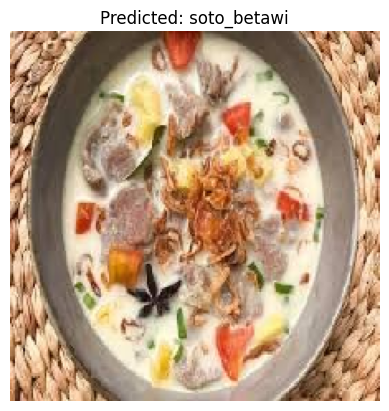

Predicted Label: soto_betawi
Prediction Probabilities: [1.17327441e-11 9.66041552e-11 5.09552643e-12 8.86093676e-06
 1.15961199e-11 2.19933383e-09 4.20036557e-08 1.41776868e-10
 1.85851047e-06 4.76088613e-10 2.69630741e-11 3.14876388e-07
 2.62990452e-09 2.99674896e-10 2.15552229e-11 5.93499738e-09
 1.66640174e-11 1.05849780e-12 2.00386485e-09 4.29669078e-10
 1.19134399e-11 1.92772201e-10 7.59338548e-08 2.79265760e-11
 3.68964711e-12 6.47210271e-11 8.47220405e-10 9.78187309e-09
 1.19579083e-10 5.27692112e-10 1.42757001e-10 7.87393206e-11
 2.03579987e-07 6.85955328e-08 2.57843378e-12 2.75186949e-07
 2.23848119e-07 2.73934053e-09 5.01494159e-11 2.38908644e-08
 1.18691501e-10 8.31586744e-10 1.85339076e-07 1.60183722e-09
 9.37692216e-11 8.45613718e-11 4.35539591e-11 2.93086688e-09
 4.39804904e-09 1.13603367e-08 1.22673215e-12 6.61300392e-09
 2.65429345e-10 1.89578175e-09 1.70313896e-08 5.69465308e-11
 1.84465310e-09 2.00977635e-08 2.63701422e-11 4.20026375e-11
 3.92352484e-10 9.86809766e-12

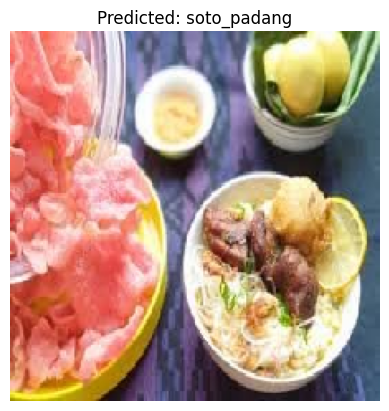

Predicted Label: soto_padang
Prediction Probabilities: [1.3353232e-07 2.4823582e-06 1.3635786e-06 6.5339736e-05 6.7569147e-07
 1.0435298e-06 3.1927959e-06 6.1017595e-06 1.4386557e-06 7.8210820e-07
 1.5099890e-06 1.4796291e-05 8.0604048e-07 7.4766423e-05 6.4144859e-07
 8.2650035e-07 1.0521270e-07 6.8771037e-08 3.1015057e-07 1.1364034e-06
 1.5535001e-06 8.5790776e-07 1.8851801e-04 5.4333748e-07 1.1116443e-08
 4.1247429e-07 1.6443757e-06 3.0690614e-08 2.0202357e-08 4.8005541e-07
 4.8785105e-09 6.1137854e-07 2.2094534e-08 8.5467676e-08 4.4478603e-09
 5.3602776e-06 1.8212927e-07 1.1174324e-07 1.6539239e-08 6.8173500e-07
 8.0302627e-08 1.8637340e-06 2.8802338e-06 1.3149972e-07 9.3579537e-08
 2.1337609e-09 4.1500749e-07 2.4751847e-07 3.4391078e-08 1.2267353e-05
 9.2454338e-09 2.0698107e-07 3.3607848e-09 3.6994471e-08 2.7378104e-07
 4.0570209e-09 6.8286894e-08 2.2508652e-07 4.7531202e-08 3.2324483e-09
 5.7161483e-08 8.7322516e-10 1.6094849e-07 1.0872812e-05 5.3309117e-07
 7.8839911e-08 7.84203

In [82]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Fungsi untuk mengklasifikasikan gambar tunggal
def classify_single_image(image_path, model, test_generator, img_size=(224, 224)):
    # Memuat gambar
    img = image.load_img(image_path, target_size=img_size)
    
    # Mengubah gambar menjadi array numpy
    img_array = image.img_to_array(img)
    
    # Normalisasi gambar (menggunakan rescaling seperti di preprocessing data)
    img_array = img_array / 255.0
    
    # Menambahkan dimensi batch (karena model mengharapkan input berupa batch)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Prediksi kelas gambar
    predictions = model.predict(img_array)
    
    # Mendapatkan kelas dengan probabilitas tertinggi
    predicted_class = np.argmax(predictions, axis=1)
    
    # Mengambil label kelas dari test_generator
    class_labels = list(test_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]
    
    # Menampilkan gambar dan hasil prediksi
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    return predicted_label, predictions[0]

# Memuat model yang sudah dilatih
model = load_model("model_10_20_epochs.h5")

# Memuat test_generator yang digunakan saat pelatihan
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    "test",  # Ganti dengan direktori data uji Anda
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Uji dengan gambar tunggal
image_path = "test/soto_betawi/0c624fd3e4.jpg"  # Ganti dengan path gambar yang ingin Anda klasifikasikan
predicted_label, prediction_probs = classify_single_image(image_path, model, test_generator)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probs}")

image_path = "test/soto_padang/2b75d5b9d4.jpg"  # Ganti dengan path gambar yang ingin Anda klasifikasikan
predicted_label, prediction_probs = classify_single_image(image_path, model, test_generator)

print(f"Predicted Label: {predicted_label}")
print(f"Prediction Probabilities: {prediction_probs}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Example true and predicted values
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # True labels
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Predicted labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")